# Homework 4

## Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import zipfile

In [4]:
zf = zipfile.ZipFile("compustat.zip")
df = pd.read_csv(zf.open("compustat.csv"))

In [3]:
mktcap = df["cshoq"] * df["prccq"]

In [4]:
mktcapmean = mktcap.mean() # mean of market cap
mktcapsd = mktcap.std() # sd of market cap
mktcapnan = len(mktcap) - mktcap.count() # number of NaN
mktcapratio = mktcapnan / len(mktcap) # ratio of NaN

salesmean = df["saleq"].mean()
salessd = df["saleq"].std()
salesnan = len(df["saleq"]) - df["saleq"].count()
salesratio = salesnan / len(df["saleq"])

In [5]:
data = {"mean" : [mktcapmean, salesmean], "sd" : [mktcapsd, salessd], "#NaN" : [mktcapnan, salesnan], "ratio NaN" : [mktcapratio, salesratio]}
pd.DataFrame(data, index=["market cap", "sales"])

,mean,sd,#NaN,ratio NaN
market cap,2057.473104,13202.197457,468276,0.258530
sales,445.150664,2679.706576,269498,0.148787


Before calculating any values, we can simply take a look at mean, sd, and min/max values in order to get a sense of any outliers in the data.

We can also take a look at a histogram or boxplot to check for outliers.

In [6]:
mktcapmax = max(mktcap.dropna())
mktcapmin = min(mktcap.dropna())
salesmax = max(df["saleq"].dropna())
salesmin = min(df["saleq"].dropna())

print(mktcapmax, mktcapmin, salesmax, salesmin)

# Since the upper bound is much more further away from the mean, we suspect that there are more outliers to the right

1540774.21 0.0 207307.334 -25623.0


In [72]:
import matplotlib.pyplot as plt

(array([1.341136e+06, 1.561000e+03, 2.130000e+02, 6.400000e+01,
        1.800000e+01, 1.900000e+01, 7.000000e+00, 3.000000e+00,
        1.000000e+00, 1.000000e+00]),
 array([      0.   ,  154077.421,  308154.842,  462232.263,  616309.684,
         770387.105,  924464.526, 1078541.947, 1232619.368, 1386696.789,
        1540774.21 ]),
 <BarContainer object of 10 artists>)

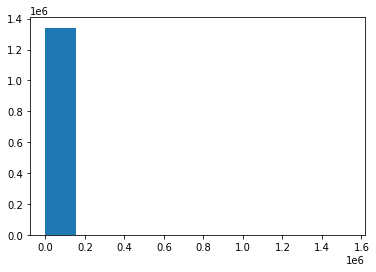

In [8]:
plt.hist(mktcap.dropna())
# from the histogram, it seems the bulk of the values are within 0 to 20,000

(array([1.800000e+01, 1.537278e+06, 3.458000e+03, 6.650000e+02,
        2.100000e+02, 1.080000e+02, 5.500000e+01, 5.000000e+00,
        1.000000e+00, 3.000000e+00]),
 array([-25623.    ,  -2329.9666,  20963.0668,  44256.1002,  67549.1336,
         90842.167 , 114135.2004, 137428.2338, 160721.2672, 184014.3006,
        207307.334 ]),
 <BarContainer object of 10 artists>)

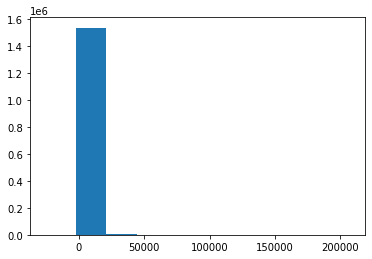

In [9]:
plt.hist(df["saleq"].dropna())

In [10]:
# We can first look at the middle values, in this case the middle 80 percentile

mktcap80 = mktcap[mktcap.between(mktcap.quantile(0.1), mktcap.quantile(0.9))]
sales80 = df["saleq"][df["saleq"].between(df["saleq"].quantile(0.1), df["saleq"].quantile(0.9))]

(array([847757., 142018.,  74549.,  47427.,  34300.,  25451.,  20081.,
         16664.,  13462.,  11762.]),
 array([1.17000e-01, 6.12450e+01, 1.22373e+02, 1.83501e+02, 2.44629e+02,
        3.05757e+02, 3.66885e+02, 4.28013e+02, 4.89141e+02, 5.50269e+02,
        6.11397e+02]),
 <BarContainer object of 10 artists>)

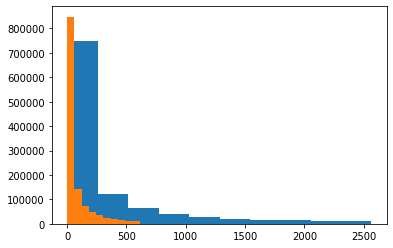

In [11]:
plt.hist(mktcap80)
plt.hist(sales80)

In [12]:
# We can also drop values that are more than 3 standard deviations from the mean

mktcap_3sd = mktcap[mktcap.between(mktcapmean - 3 * mktcapsd, mktcapmean + 3 * mktcapsd)]
sales_3sd = df["saleq"][df["saleq"].between(salesmean - 3 * salessd, salesmean + 3 * salessd)]

(array([1.000000e+00, 3.000000e+00, 9.000000e+00, 4.500000e+01,
        1.423437e+06, 6.496600e+04, 2.014200e+04, 9.208000e+03,
        5.391000e+03, 3.501000e+03]),
 array([-6724.095 , -5203.2684, -3682.4418, -2161.6152,  -640.7886,
          880.038 ,  2400.8646,  3921.6912,  5442.5178,  6963.3444,
         8484.171 ]),
 <BarContainer object of 10 artists>)

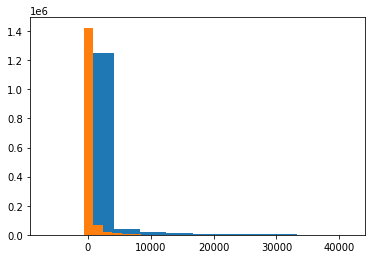

In [13]:
plt.hist(mktcap_3sd)
plt.hist(sales_3sd)

Since we are looking at data from many different industries, the outliers indicates that some particular industries have much higher sales numbers and market cap than the rest.

## Compute Industry Concentration

In [5]:
df["industry"] = [str(i)[:2] for i in df["sic"]] # adding a column with the first two digits of sic

In [6]:
df2 = df.dropna(subset=["industry", "saleq", "cusip", "datacqtr"])

In [13]:
grouped = df2["saleq"].groupby([df2["industry"], df2["cusip"]]) # group by industry and company id

In [20]:
grouped2 = df2["saleq"].groupby(df2["industry"]) # group only by industry

In [30]:
mktshare = (grouped.mean() / grouped2.sum() * 100) ** 2 # the squared values of their market shares

In [38]:
avgHHI = mktshare.unstack().sum(axis=1) # sum up the rows to get HHI for each industry

In [41]:
top4 = sorted(avgHHI, reverse=True)[1:5]

In [43]:
for i in top4:
    print(avgHHI[avgHHI == i]) # top 4 highest avg HHI

industry
84    49.090265
dtype: float64
industry
89    42.950792
dtype: float64
industry
86    18.903592
dtype: float64
industry
81    3.539244
dtype: float64


In [46]:
ind84 = grouped2.get_group("84")
ind89 = grouped2.get_group("89")
ind86 = grouped2.get_group("86")
ind81 = grouped2.get_group("81")

In [74]:
group84 = ind84.groupby([df2["datacqtr"], df2["cusip"]])
group84_2 = ind84.groupby(df2["datacqtr"])
group89 = ind89.groupby([df2["datacqtr"], df2["cusip"]])
group89_2 = ind89.groupby(df2["datacqtr"])
group86 = ind86.groupby([df2["datacqtr"], df2["cusip"]])
group86_2 = ind86.groupby(df2["datacqtr"])
group81 = ind81.groupby([df2["datacqtr"], df2["cusip"]])
group81_2 = ind81.groupby(df2["datacqtr"])

In [75]:
mktshare84 = (group84.sum() / group84_2.sum() * 100) ** 2
mktshare89 = (group89.sum() / group89_2.sum() * 100) ** 2
mktshare86 = (group86.sum() / group86_2.sum() * 100) ** 2
mktshare81 = (group81.sum() / group81_2.sum() * 100) ** 2

In [76]:
ts84 = mktshare84.unstack().sum(axis=1)
ts89 = mktshare89.unstack().sum(axis=1)
ts86 = mktshare86.unstack().sum(axis=1)
ts81 = mktshare81.unstack().sum(axis=1)

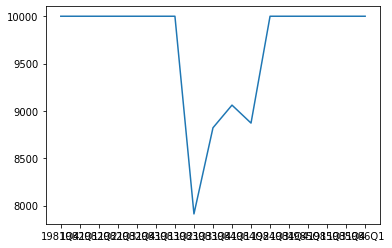

In [82]:
plt.plot(ts84)

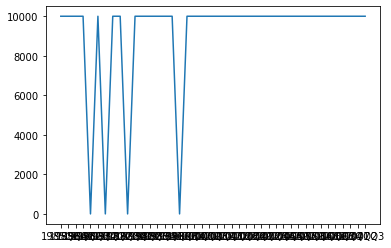

In [81]:
plt.plot(ts89)

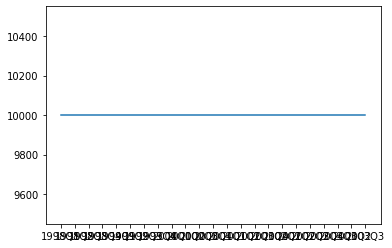

In [83]:
plt.plot(ts86)

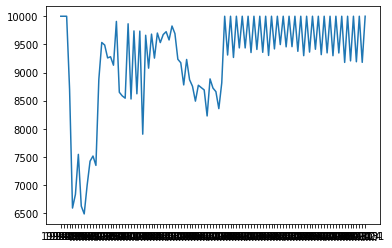

In [84]:
plt.plot(ts81)